In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.datasets import load_iris
from sklearn import metrics

In [2]:
iris=load_iris()
for keys in iris.keys():
    print(keys)

data
target
frame
target_names
DESCR
feature_names
filename


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X=iris.data
y=iris.target
# Test Size is 80%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [86]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
knn = KNeighborsClassifier(n_neighbors=10)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_test)

In [8]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [9]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_test, knn_pred)

0.9666666666666667

In [10]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [11]:
knn_params = {'knn__n_neighbors': range(1, 30)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    4.8s finished


({'knn__n_neighbors': 5}, 0.95)

In [12]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.9666666666666667

i) Use the 150 observations in the Iris datasetto traina kNN model. Use a train-test 80% to 20% balanced split,plot the train errorandtest error for k=1-30,what isthe best k? Explain  your  choice. 

answer > The best k is 5 because it has the highest score out of all the k

In [13]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

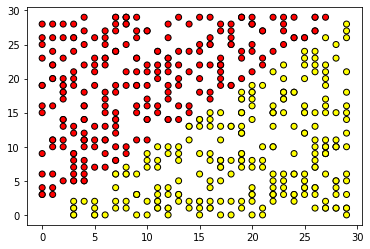

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')

In [43]:
# Get the data that you need for it
testing_data = np.array([[6.2, 3.0, 4.5, 1.8],
                [5.2, 3.0, 2.5, 0.9]])

k =  1 prediction: [2. 0.]
k =  2 prediction: [2.  0.5]
k =  3 prediction: [1.66666667 0.33333333]
k =  4 prediction: [1.75 0.25]
k =  5 prediction: [1.6 0.2]
k =  6 prediction: [1.5        0.16666667]
k =  7 prediction: [1.42857143 0.14285714]
k =  8 prediction: [1.375 0.25 ]
k =  9 prediction: [1.33333333 0.33333333]
k =  10 prediction: [1.4 0.3]
k =  11 prediction: [1.36363636 0.27272727]
k =  12 prediction: [1.33333333 0.25      ]
k =  13 prediction: [1.30769231 0.23076923]
k =  14 prediction: [1.28571429 0.21428571]
k =  15 prediction: [1.26666667 0.2       ]
k =  16 prediction: [1.3125 0.1875]
k =  17 prediction: [1.29411765 0.17647059]
k =  18 prediction: [1.33333333 0.16666667]
k =  19 prediction: [1.31578947 0.15789474]
k =  20 prediction: [1.3  0.15]
k =  21 prediction: [1.33333333 0.14285714]
k =  22 prediction: [1.31818182 0.18181818]
k =  23 prediction: [1.30434783 0.17391304]
k =  24 prediction: [1.29166667 0.16666667]
k =  25 prediction: [1.28 0.16]
k =  26 prediction: [

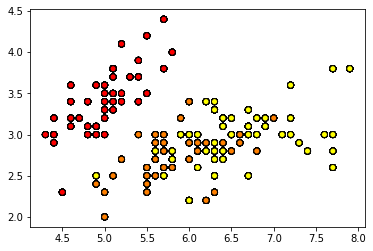

In [85]:
prediction_list_axis0 = []
prediction_list_axis1 = []
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)
    pred=model.predict(testing_data)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')
    print('k = ' , K , 'prediction:', pred)
    prediction_list_axis0.append(pred[0])
    prediction_list_axis1.append(pred[1])

In [77]:
print(prediction_list_axis0)
print(prediction_list_axis1)

[2.0, 2.0, 1.6666666666666667, 1.75, 1.6, 1.5, 1.4285714285714286, 1.375, 1.3333333333333333, 1.4, 1.3636363636363635, 1.3333333333333333, 1.3076923076923077, 1.2857142857142858, 1.2666666666666666, 1.3125, 1.2941176470588236, 1.3333333333333333, 1.3157894736842106, 1.3, 1.3333333333333333, 1.3181818181818181, 1.3043478260869565, 1.2916666666666667, 1.28, 1.3076923076923077, 1.3333333333333333, 1.3571428571428572, 1.3793103448275863, 1.3666666666666667]
[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.25, 0.3333333333333333, 0.3, 0.2727272727272727, 0.25, 0.23076923076923078, 0.21428571428571427, 0.2, 0.1875, 0.17647058823529413, 0.16666666666666666, 0.15789473684210525, 0.15, 0.14285714285714285, 0.18181818181818182, 0.17391304347826086, 0.16666666666666666, 0.16, 0.15384615384615385, 0.14814814814814814, 0.14285714285714285, 0.1724137931034483, 0.16666666666666666]


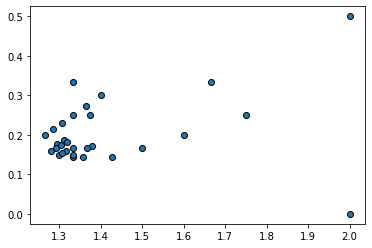

In [78]:
model = neighbors.KNeighborsRegressor(n_neighbors = 1)

model.fit(X_train, y_train)
pred=model.predict(testing_data)
plt.scatter(prediction_list_axis0, prediction_list_axis1,cmap='autumn', edgecolors='black')

In [89]:
prediction_list_axis0 = []
prediction_list_axis1 = []
for K in [1,5,10]:
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train, y_train)
    pred=model.predict(testing_data)
    print('k = ' , K , 'prediction:', pred)
    prediction_list_axis0.append(pred[0])
    prediction_list_axis1.append(pred[1])

k =  1 prediction: [2 0]
k =  5 prediction: [2 0]
k =  10 prediction: [1 0]


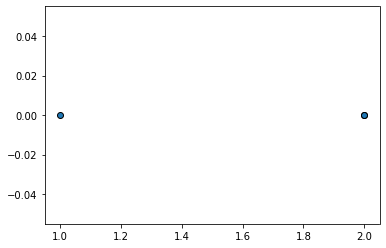

In [80]:
plt.scatter(prediction_list_axis0, prediction_list_axis1,cmap='autumn', edgecolors='black')